## Dataset: https://www.kaggle.com/datasets/surajjha101/myntra-reviews-on-women-dresses-comprehensive

## Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the dataset

In [31]:
df = pd.read_csv('Women Dresses Reviews Dataset.csv')
df.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1


## Data Cleaning

#### we didn't required 's.no' column so will delete it

In [32]:
df.drop('s.no', inplace=True, axis=1)
df.head()

,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1


In [33]:
df.shape # checking the row count

(23486, 10)

In [34]:
df.info() # checking the datatypes of the column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   23486 non-null  int64 
 1   division_name         23472 non-null  object
 2   department_name       23472 non-null  object
 3   class_name            23472 non-null  object
 4   clothing_id           23486 non-null  int64 
 5   title                 19676 non-null  object
 6   review_text           22641 non-null  object
 7   alike_feedback_count  23486 non-null  int64 
 8   rating                23486 non-null  int64 
 9   recommend_index       23486 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [35]:
# lets check null values
df.isna().sum()

age                        0
division_name             14
department_name           14
class_name                14
clothing_id                0
title                   3810
review_text              845
alike_feedback_count       0
rating                     0
recommend_index            0
dtype: int64

In [36]:
df[df['division_name'].isna()]

,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
593,34,NaN,NaN,NaN,184,Nubby footless tights,"These are amazing quality. i agree, size up to...",5,5,1
2275,36,NaN,NaN,NaN,152,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",0,5,1
4349,43,NaN,NaN,NaN,665,So worth it!,Got these on sale...absolutely love eberjey! f...,0,5,1
4745,50,NaN,NaN,NaN,772,Comfy sweatshirt!,This sweatshirt is really nice! it's oversize...,0,5,1
7589,39,NaN,NaN,NaN,152,"""long and warm""",These leg warmers are perfect for me. they are...,0,5,1
8163,25,NaN,NaN,NaN,72,My favorite socks!!!,"I never write reviews, but these socks are so ...",0,5,1
8333,36,NaN,NaN,NaN,136,Super socks,I love these little socks ? and the dots spark...,0,5,1
14464,54,NaN,NaN,NaN,184,New workhorse,These tights are amazing! if i care for them w...,0,5,1
14670,49,NaN,NaN,NaN,492,Wardrobe staple,Love this hoodie. so soft and goes with everyt...,0,5,1
15513,37,NaN,NaN,NaN,152,Love!,I am loving these. they are quite long but are...,0,5,1


#### I am going to delete the rows with nan value cause I don't need them in 'division_name', 'department_name' and 'class_name'.I am not deleting rows with column name 'title' and 'review_text' having nan because I am not going to use this column for analysis

In [37]:
df.dropna(subset=['division_name', 'department_name', 'class_name'], inplace=True)
df = df.reset_index(drop = True)

In [38]:
df.shape

(23472, 10)

In [39]:
df.isna().sum()

age                        0
division_name              0
department_name            0
class_name                 0
clothing_id                0
title                   3809
review_text              844
alike_feedback_count       0
rating                     0
recommend_index            0
dtype: int64

<h1></h1>

## Data Analysis

In [40]:
df.head()

,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1


In [25]:
# want to check what is the age range
Age = list(df.age.value_counts().keys())
Age_freq = list(df.age.value_counts().values)

In [77]:
df_age = pd.DataFrame(list(df['age'].unique()), columns = ['age'])

In [78]:
df_age.sort_values(by='age', ascending=True, inplace=True)

In [79]:
df_age.reset_index(drop = True)

,age
0,18
1,19
2,20
3,21
4,22
...,...
72,91
73,92
74,93
75,94


In [80]:
age = list(df_age['age'].unique())
cnt = []
for i in age:
    cnt.append(list(df[['age']][df['age']==i].value_counts())[0])

In [81]:
df_age = df_age.assign(freq = cnt)

In [82]:
df_age

,age,freq
76,18,4
49,19,40
57,20,108
31,21,102
58,22,146
...,...,...
69,91,5
60,92,1
71,93,2
70,94,3


In [83]:
df_age.reset_index(drop = True)

,age,freq
0,18,4
1,19,40
2,20,108
3,21,102
4,22,146
...,...,...
72,91,5
73,92,1
74,93,2
75,94,3


<AxesSubplot:xlabel='age', ylabel='freq'>

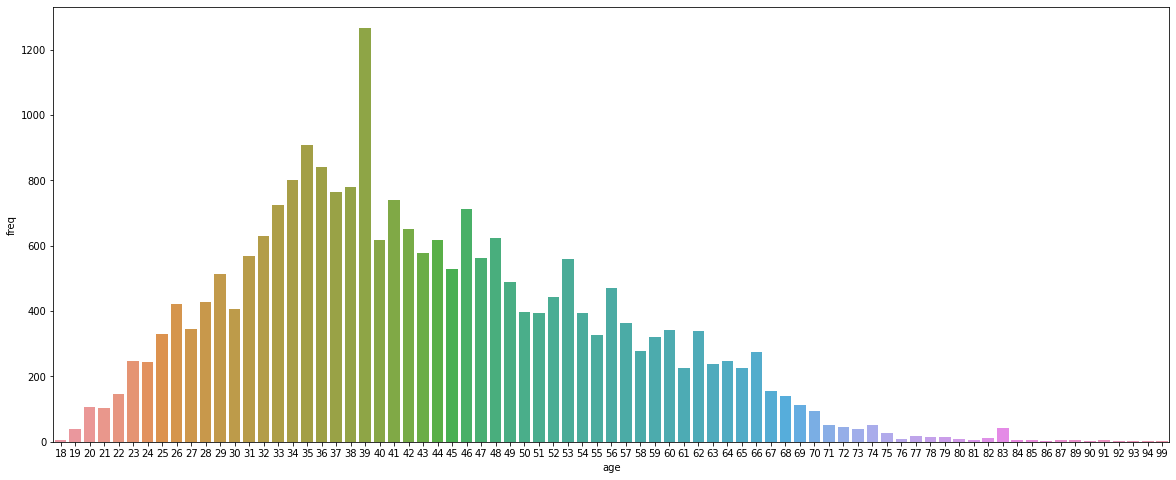

In [92]:
plt.figure(figsize=(20,8))
sns.barplot(data=df_age, x="age",y="freq")

#### Observation: Women of 30 - 50 age range are more likely to go shoping
    *  Reason can be they are more financially independant by that time and are more into shoping

In [95]:
df['division_name'].unique()

array(['General', 'General Petite', 'Initmates'], dtype=object)

In [99]:
df['division_name'].value_counts()

General           13850
General Petite     8120
Initmates          1502
Name: division_name, dtype: int64

<AxesSubplot:>

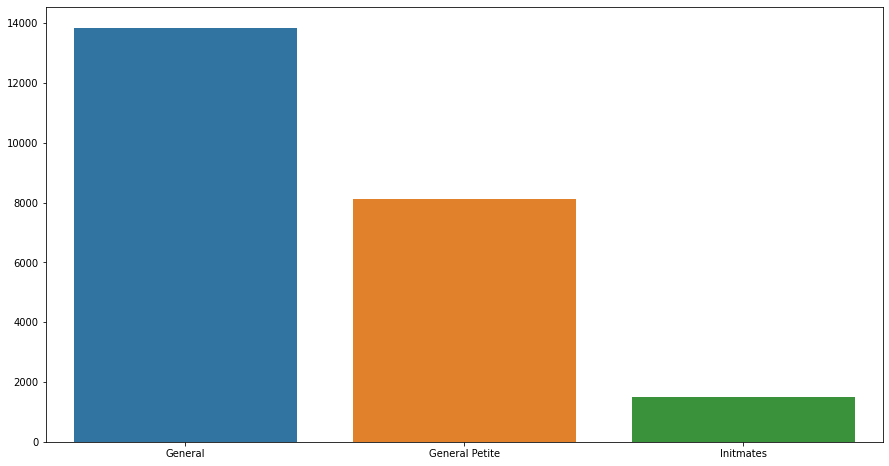

In [102]:
plt.figure(figsize=(15,8))
sns.barplot(x=list(df['division_name'].value_counts().keys()),y=list(df['division_name'].value_counts().values))

In [111]:
df_general = pd.DataFrame(df[['age']][df['division_name'] == 'General'].value_counts(), columns=['frequency'])

In [114]:
df_general.sort_values(by='age', ascending=True, inplace=True)

In [123]:
df_general.reset_index(level=['age'], inplace=True)

In [124]:
df_general

,age,frequency
0,18,4
1,19,26
2,20,58
3,21,58
4,22,91
...,...,...
72,91,4
73,92,1
74,93,1
75,94,3


<AxesSubplot:xlabel='age', ylabel='frequency'>

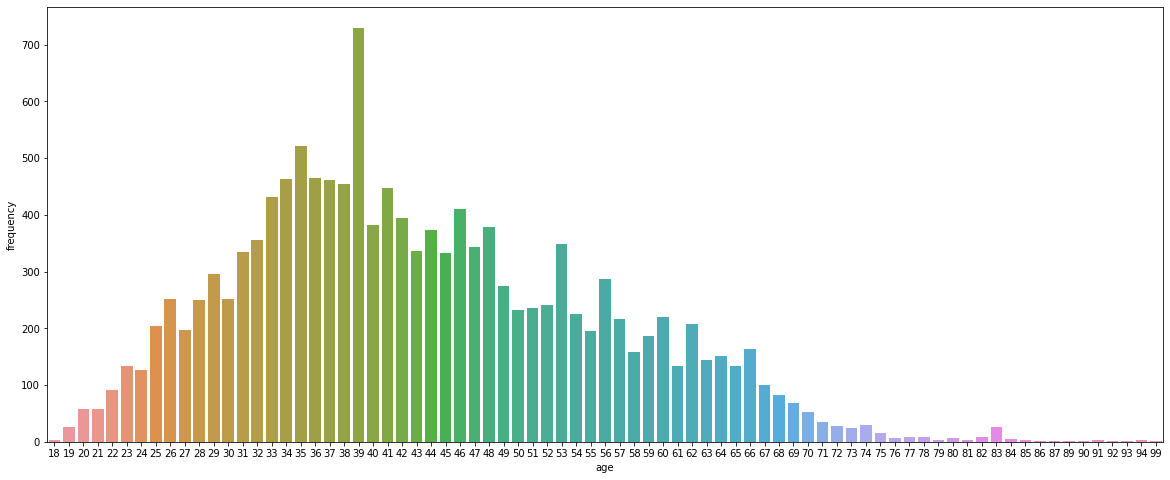

In [126]:
plt.figure(figsize=(20,8))
sns.barplot(data=df_general, x='age',y="frequency")

In [127]:
df_general_petite = pd.DataFrame(df[['age']][df['division_name'] == 'General Petite'].value_counts(), columns=['frequency'])

In [129]:
df_general_petite.sort_values(by='age', ascending=True, inplace=True)

In [130]:
df_general_petite.reset_index(level=['age'], inplace=True)

In [131]:
df_general_petite

,age,frequency
0,19,7
1,20,39
2,21,35
3,22,48
4,23,94
...,...,...
66,85,3
67,87,2
68,89,1
69,90,1


<AxesSubplot:xlabel='age', ylabel='frequency'>

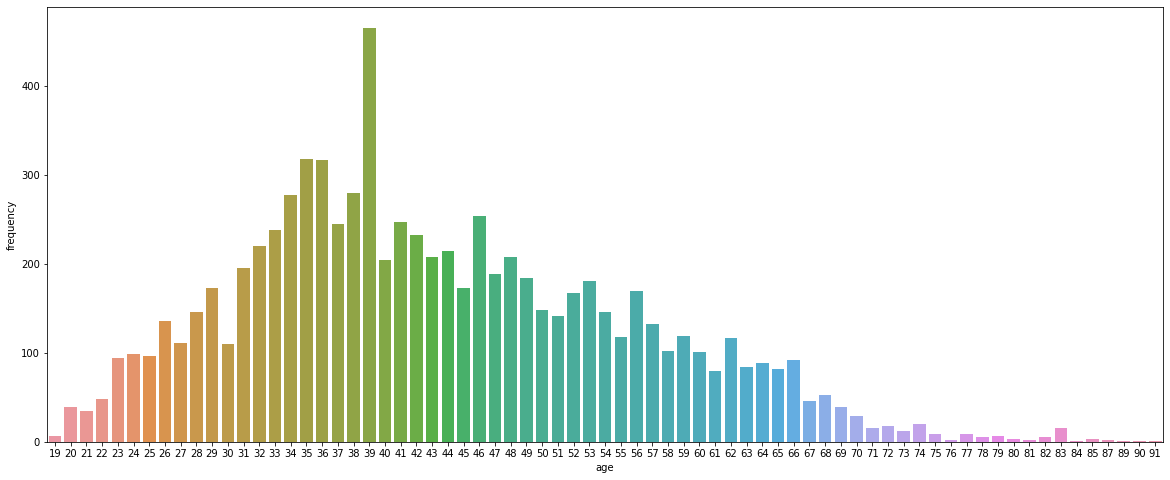

In [132]:
plt.figure(figsize=(20,8))
sns.barplot(data=df_general_petite, x='age',y="frequency")

In [133]:
df_initmates = pd.DataFrame(df[['age']][df['division_name'] == 'Initmates'].value_counts(), columns=['frequency'])

In [134]:
df_initmates.sort_values(by='age', ascending=True, inplace=True)

In [135]:
df_initmates.reset_index(level=['age'], inplace=True)

In [136]:
df_initmates

,age,frequency
0,19,7
1,20,11
2,21,9
3,22,7
4,23,19
...,...,...
59,83,2
60,86,1
61,87,1
62,89,2


<AxesSubplot:xlabel='age', ylabel='frequency'>

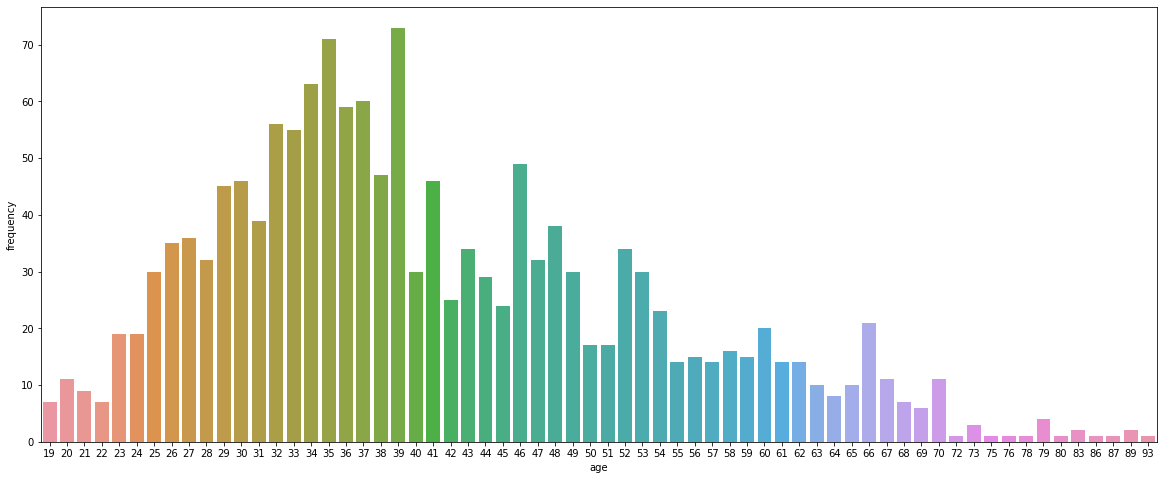

In [137]:
plt.figure(figsize=(20,8))
sns.barplot(data=df_initmates, x='age',y="frequency")

#### Observation: I don't see much difference between the Division of the Cloth customer has bought in different age group chart
    *  Though frequency have shown decrease for division_name      General           13850
                                                                   General Petite     8120
                                                                   Initmates          1502

<AxesSubplot:>

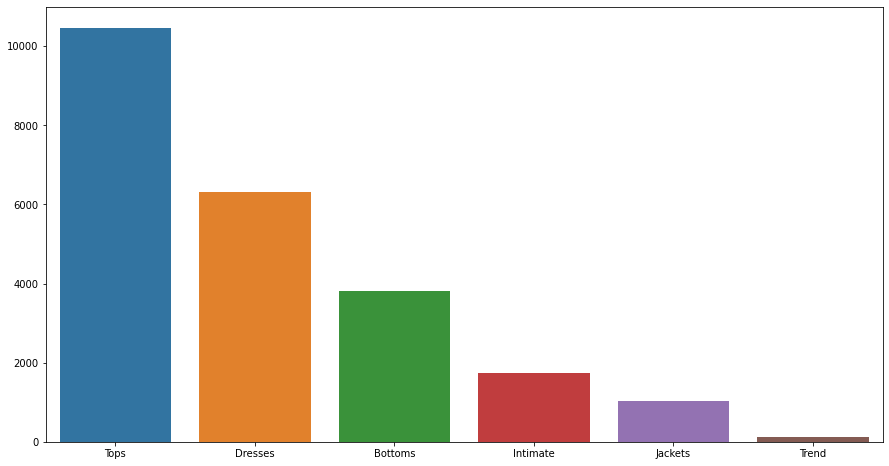

In [138]:
plt.figure(figsize=(15,8))
sns.barplot(x=list(df['department_name'].value_counts().keys()),y=list(df['department_name'].value_counts().values))

#### Tops are the highest buy by women according to our dataset

In [139]:
df_tops = pd.DataFrame(df[['age']][df['department_name'] == 'Tops'].value_counts(), columns=['frequency'])

In [141]:
df_tops.sort_values(by='age', ascending=True, inplace=True)

In [142]:
df_tops.reset_index(level=['age'], inplace=True)

<AxesSubplot:xlabel='age', ylabel='frequency'>

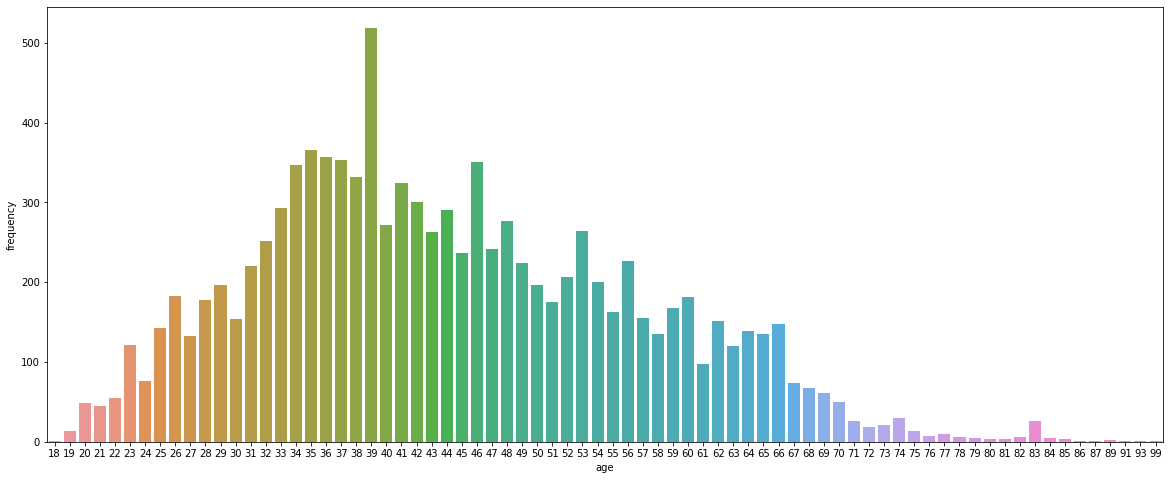

In [143]:
plt.figure(figsize=(20,8))
sns.barplot(data=df_tops, x='age',y="frequency")

<AxesSubplot:xlabel='age', ylabel='frequency'>

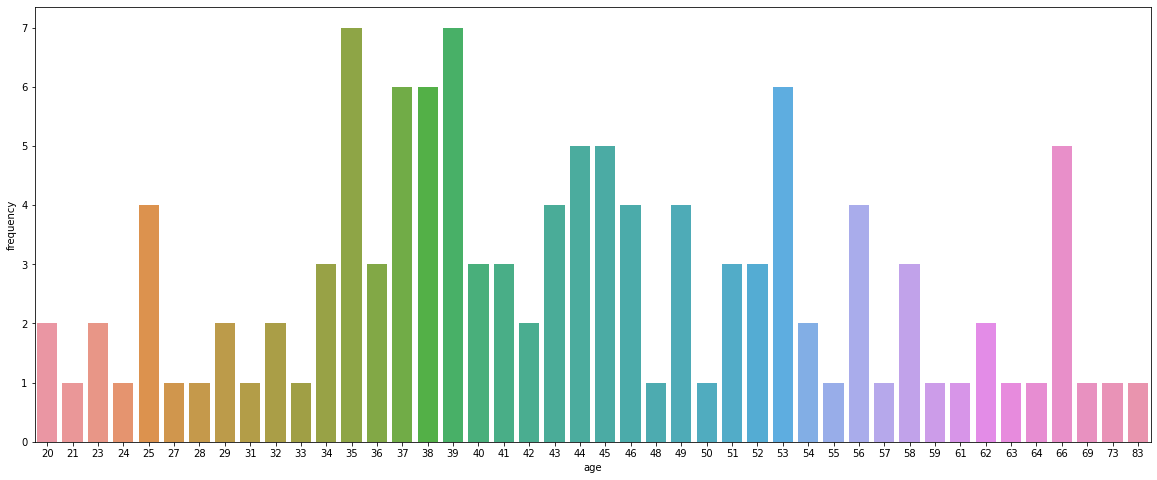

In [144]:
df_trend = pd.DataFrame(df[['age']][df['department_name'] == 'Trend'].value_counts(), columns=['frequency'])
df_trend.sort_values(by='age', ascending=True, inplace=True)
df_trend.reset_index(level=['age'], inplace=True)
plt.figure(figsize=(20,8))
sns.barplot(data=df_trend, x='age',y="frequency")

#### From above chart I can say Trend cloths are popular in almost all age group

<AxesSubplot:>

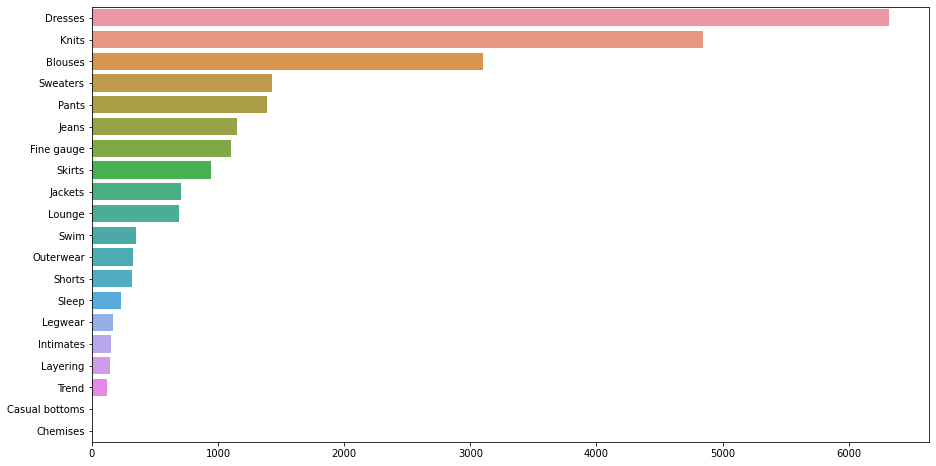

In [148]:
plt.figure(figsize=(15,8))
sns.barplot(y=list(df['class_name'].value_counts().keys()),x=list(df['class_name'].value_counts().values))

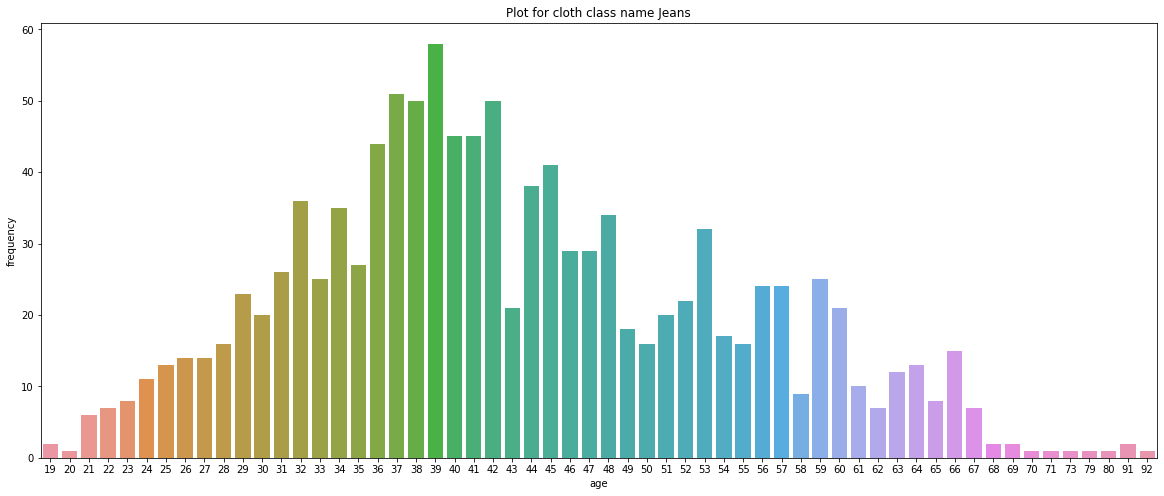

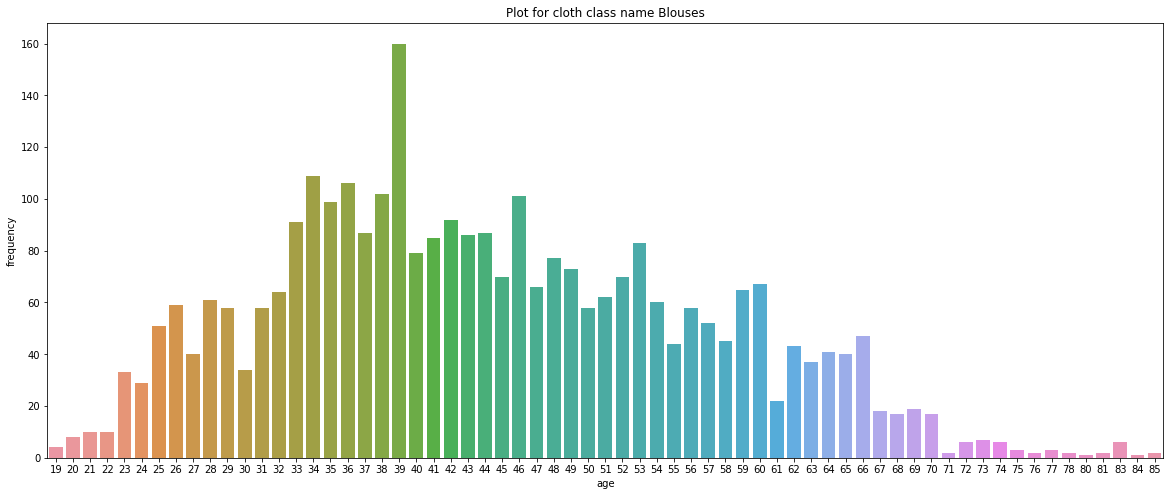

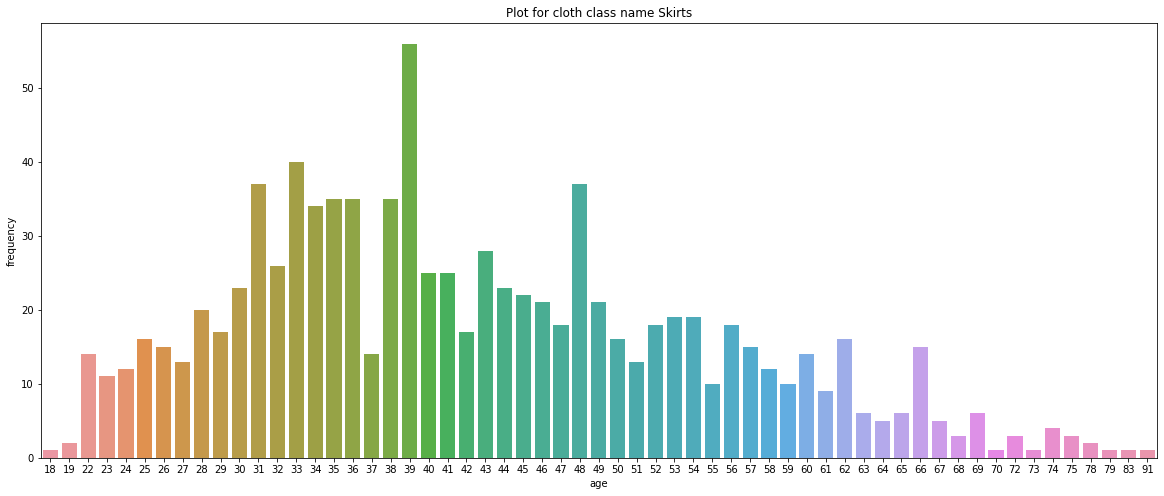

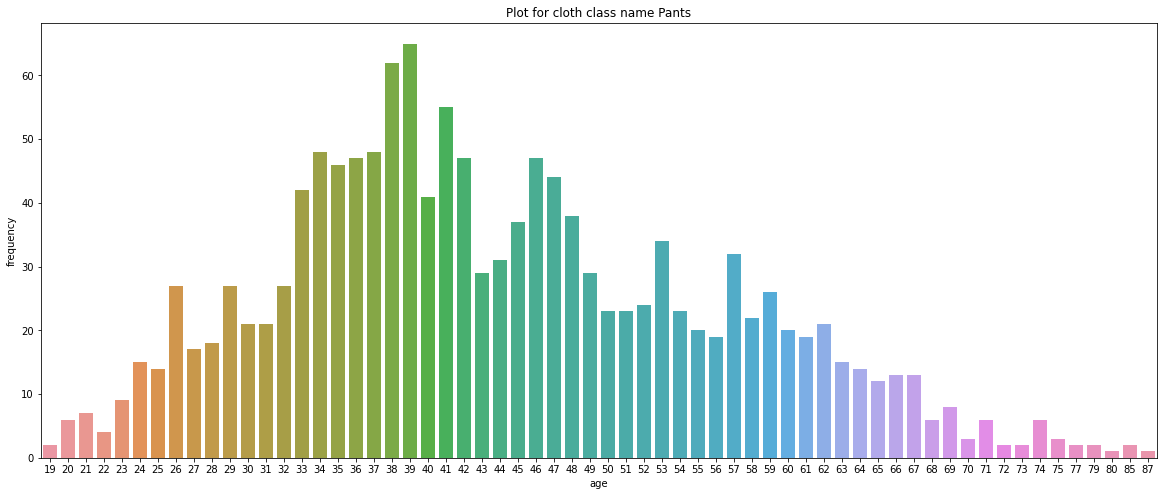

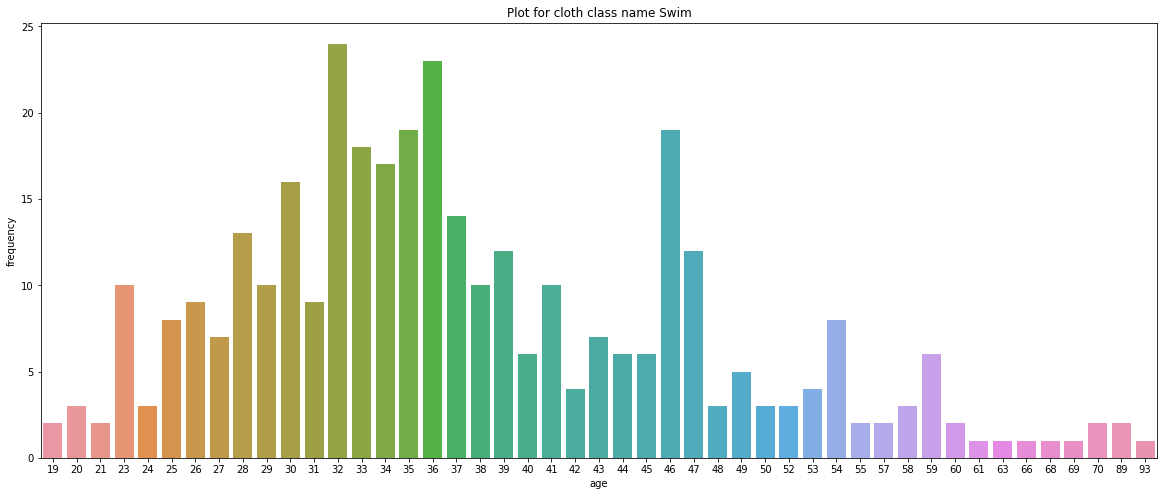

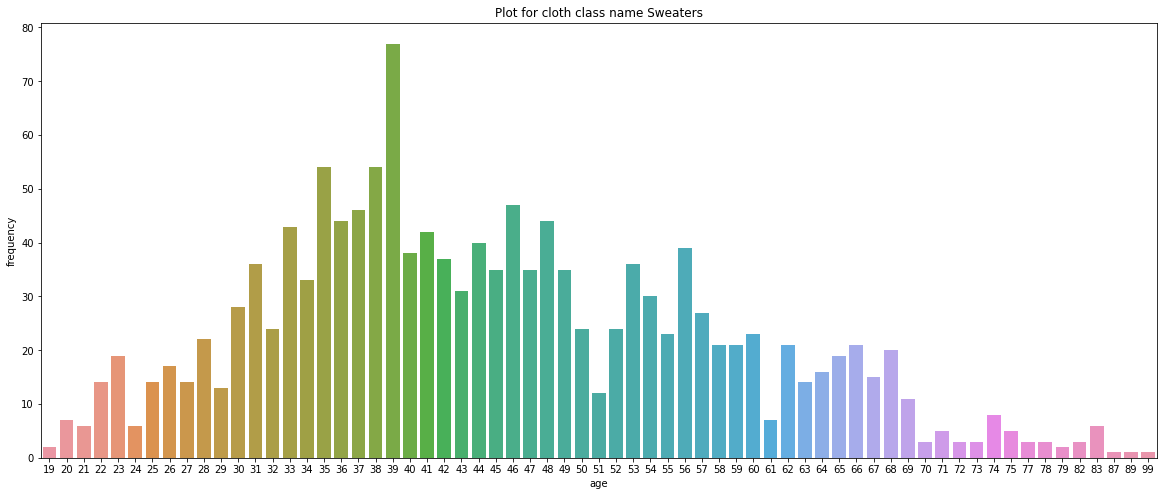

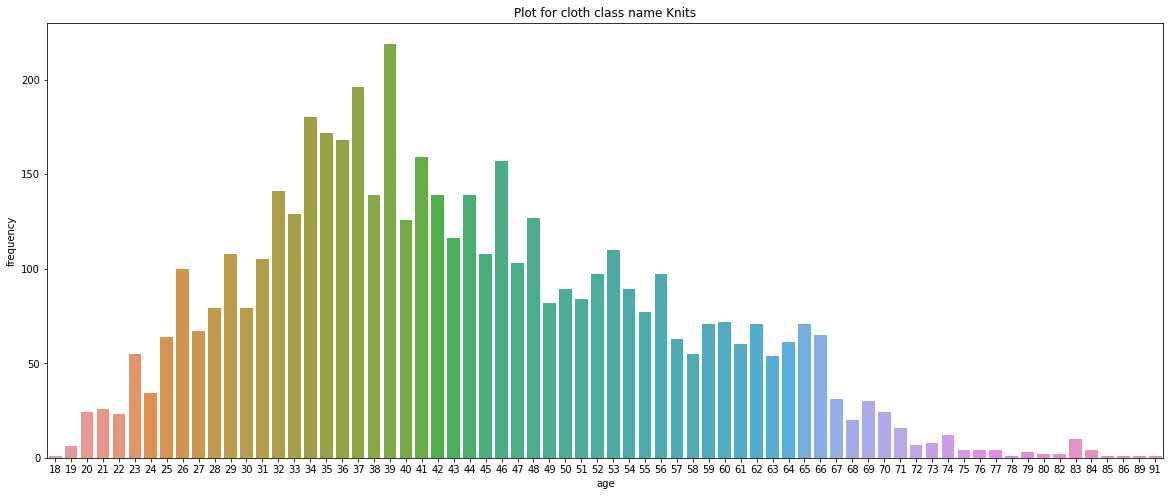

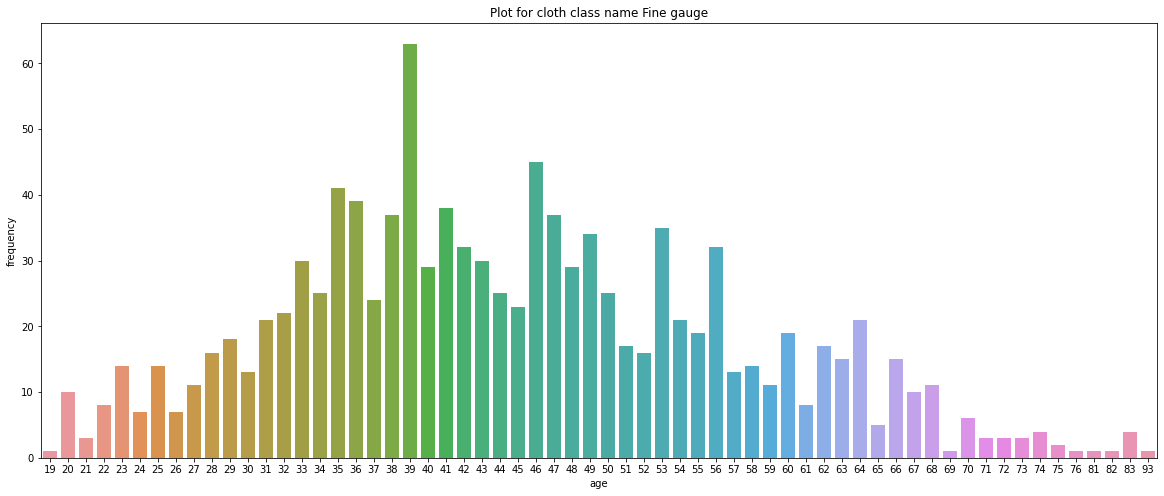

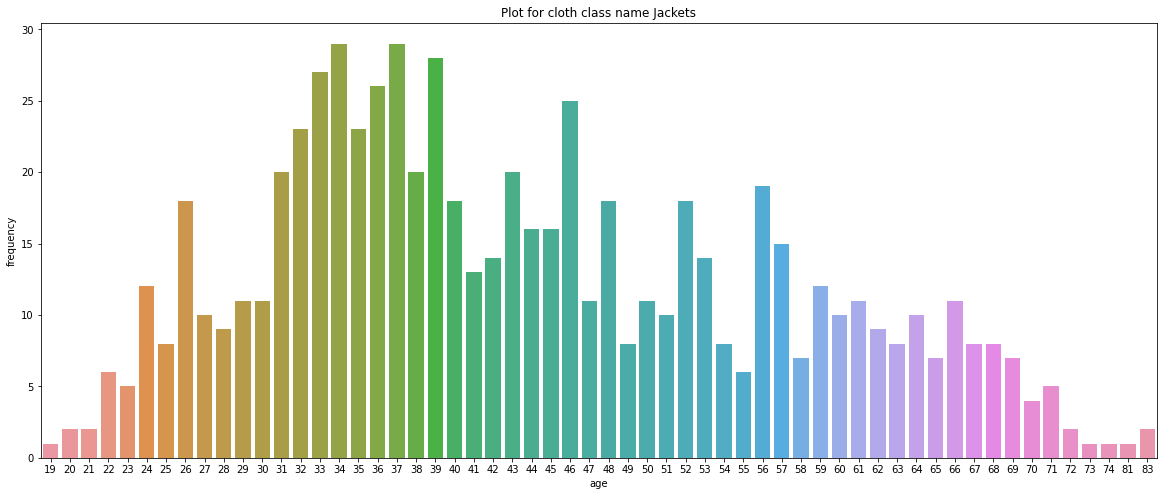

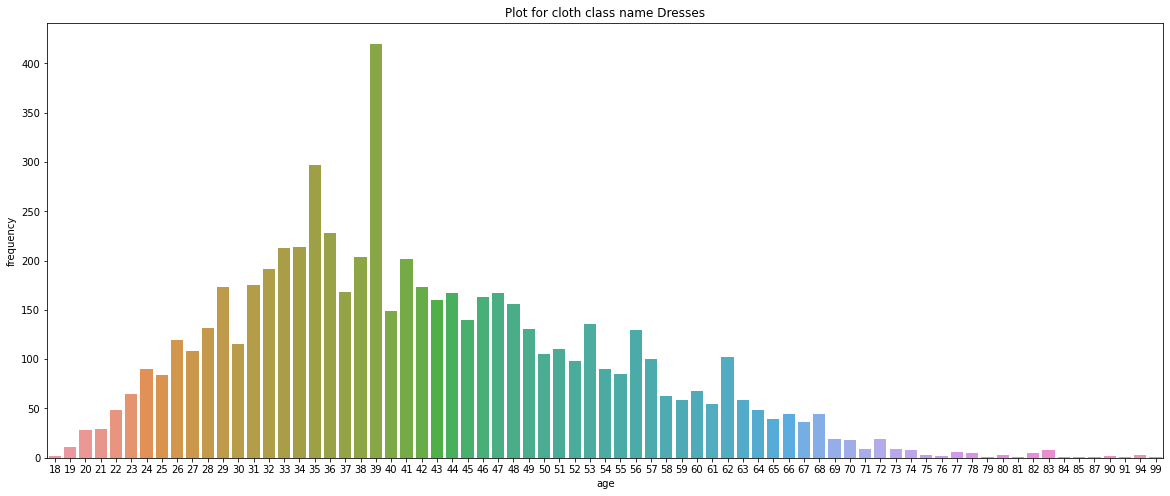

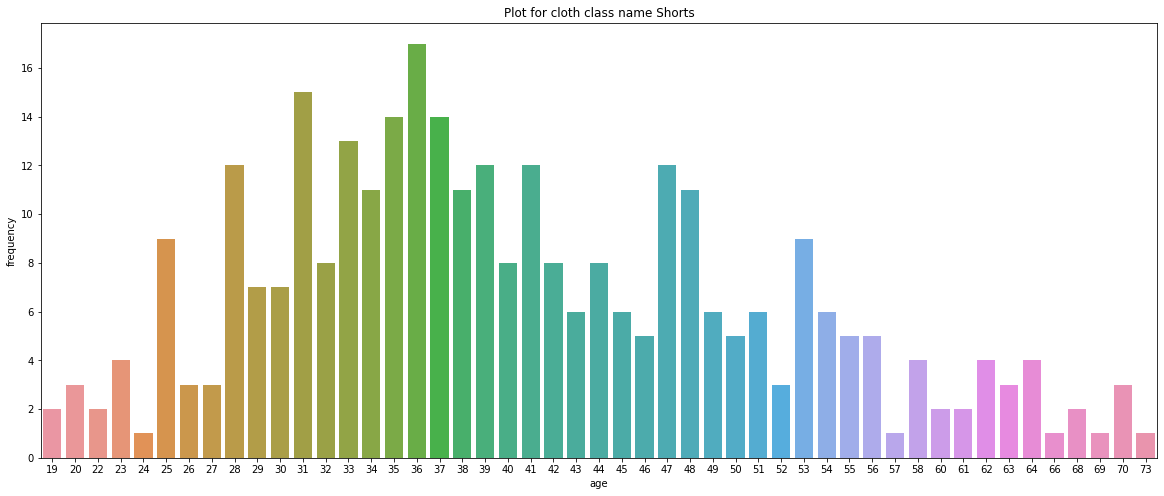

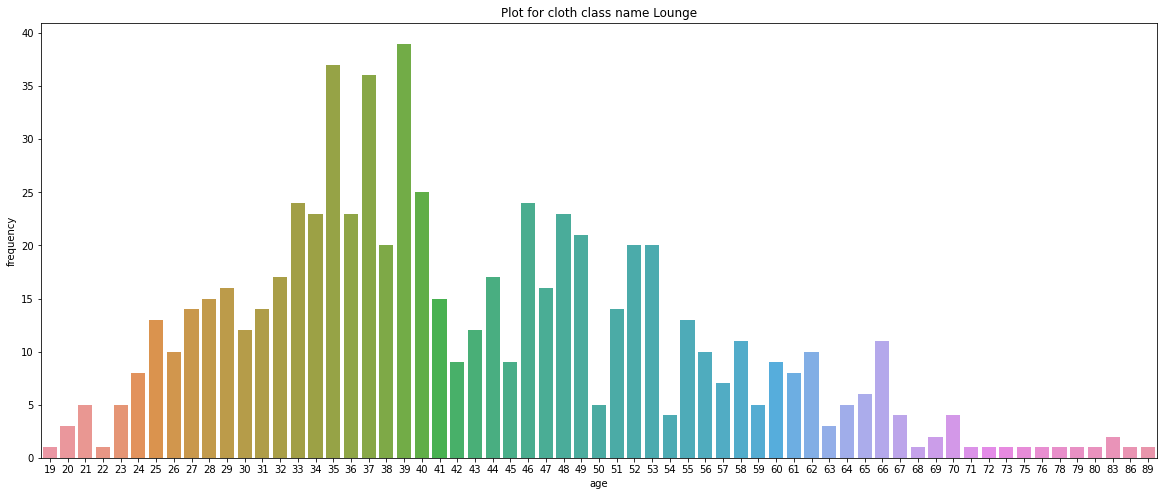

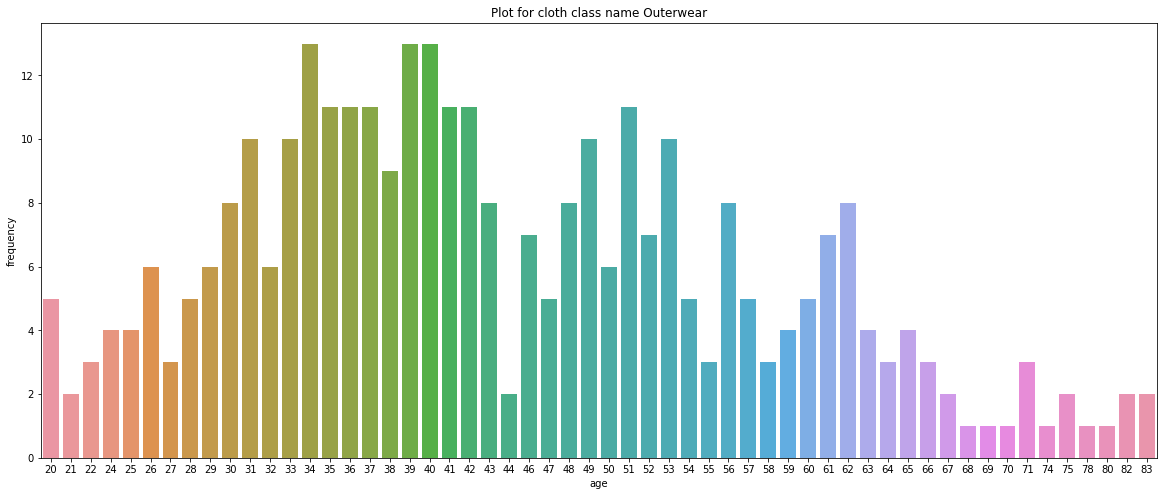

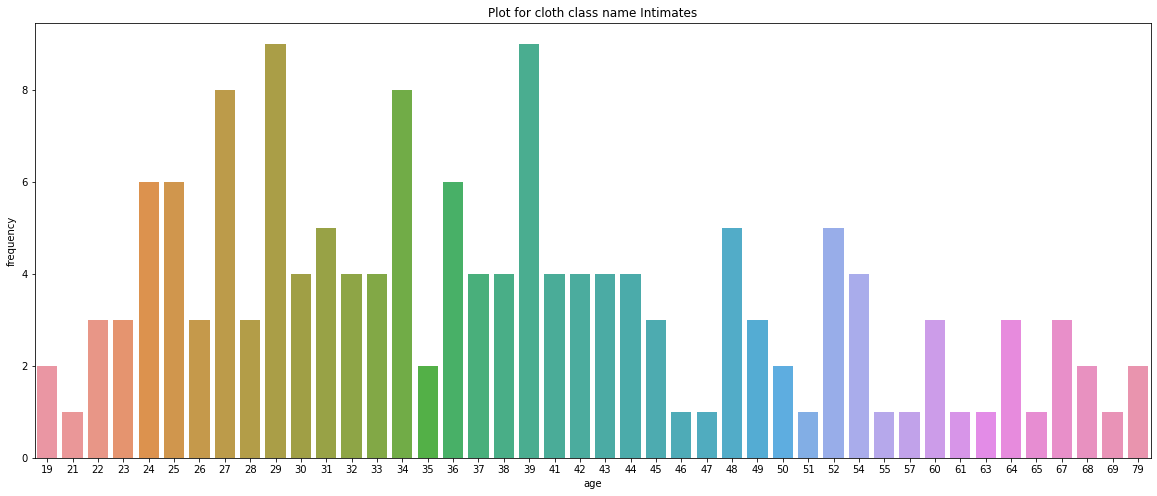

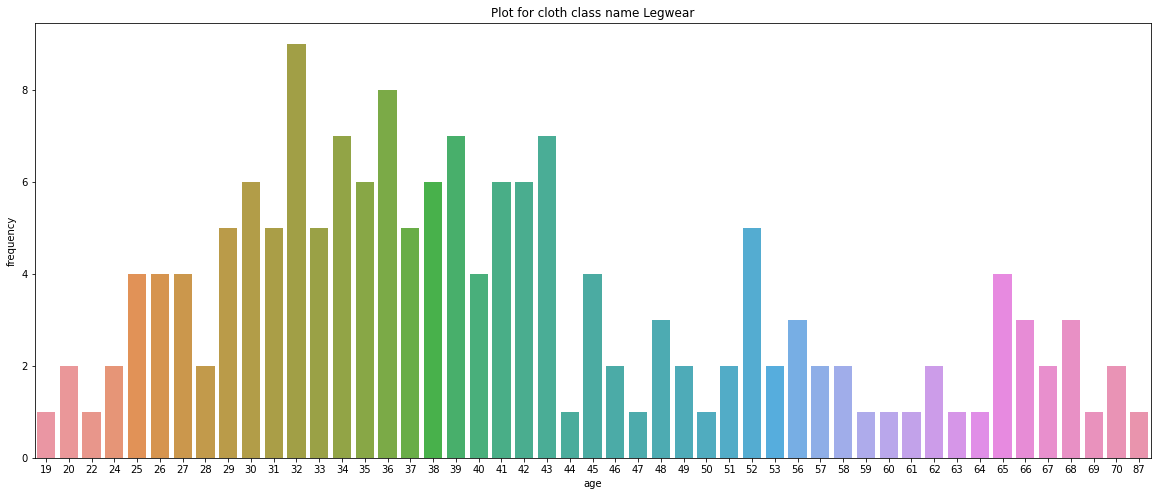

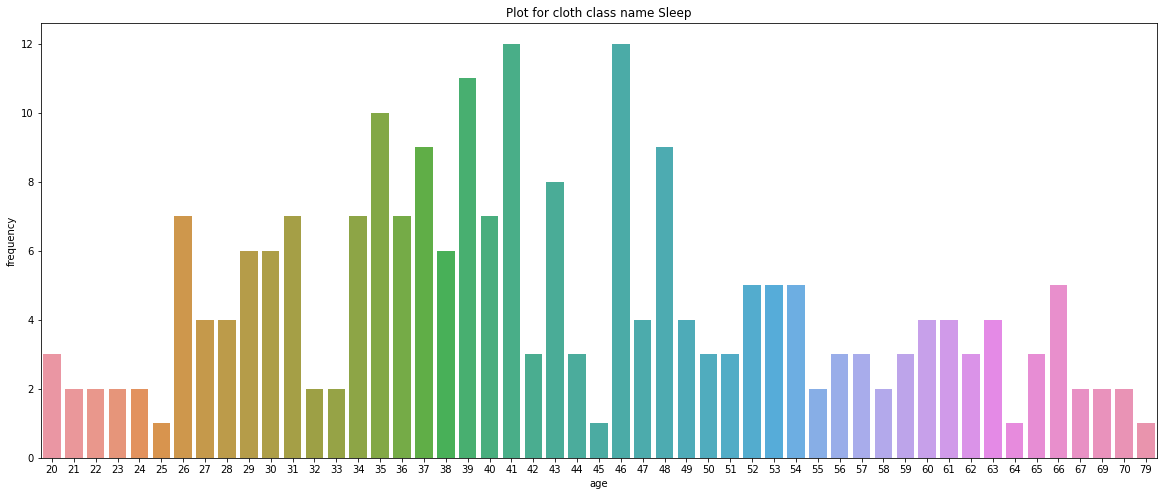

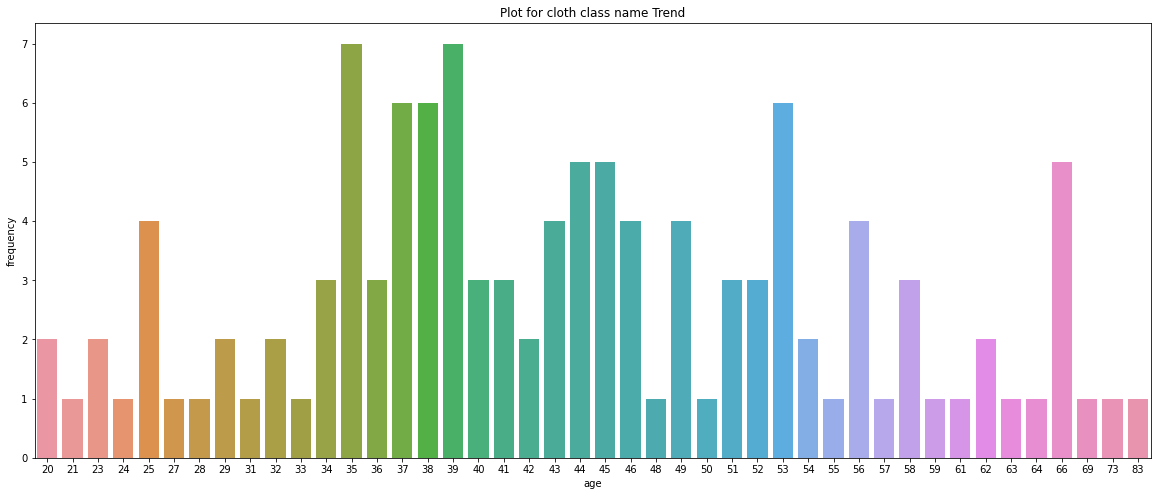

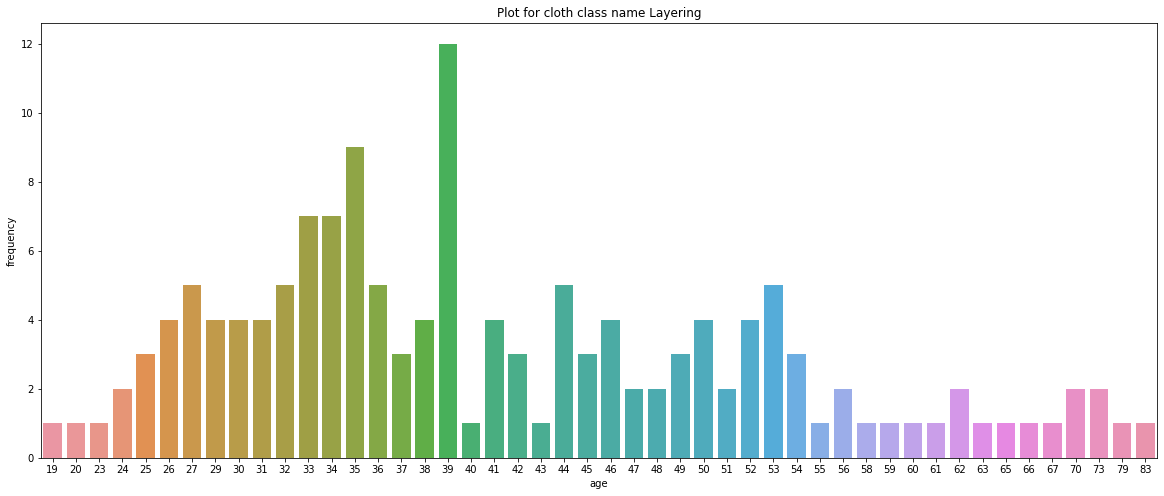

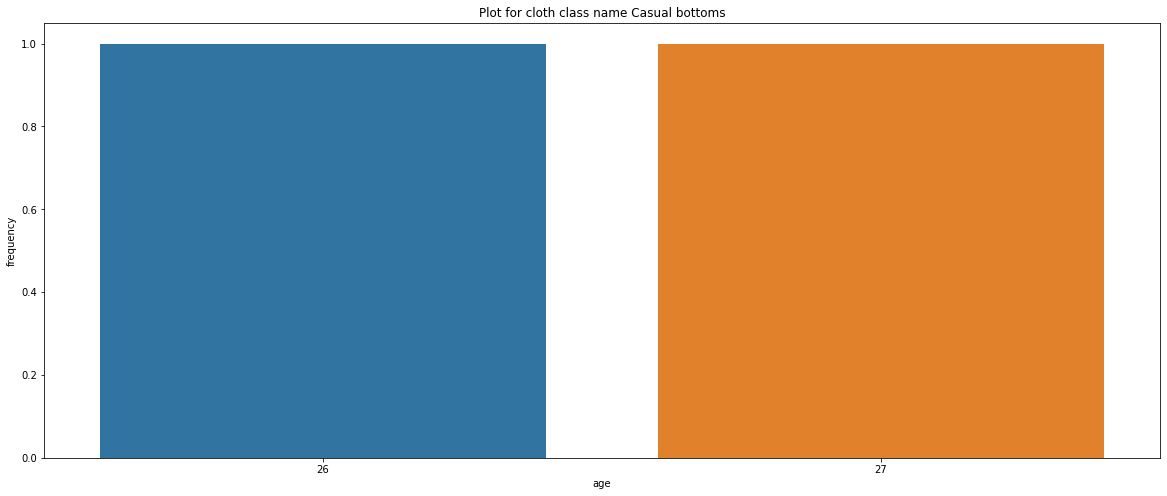

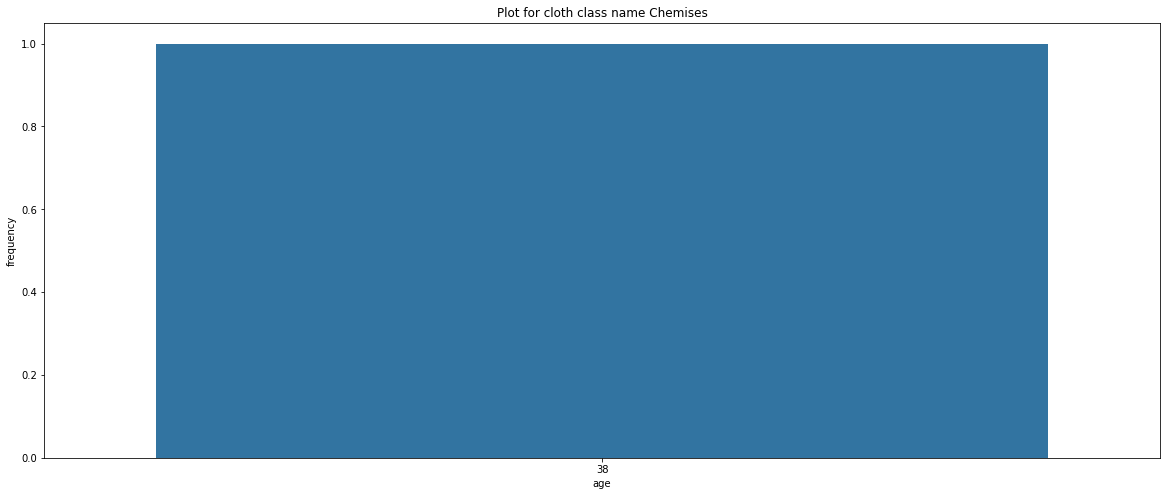

In [151]:
for i in list(df['class_name'].unique()):
    df_i = pd.DataFrame(df[['age']][df['class_name'] == i].value_counts(), columns=['frequency'])
    df_i.sort_values(by='age', ascending=True, inplace=True)
    df_i.reset_index(level=['age'], inplace=True)
    plt.figure(figsize=(20,8))
    plot = sns.barplot(data=df_i, x='age',y="frequency")
    plot.set(title = f"Plot for cloth class name {i}")

In [152]:
df.head()

,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1


In [169]:
data = []
for i in list(df['age'].unique()):
    data.append([int(i), round(float(df[['rating']][df['age'] == i].mean()),1)])

print(data)

[[40, 4.1], [62, 4.4], [47, 4.1], [45, 4.2], [37, 4.2], [43, 4.1], [83, 4.8], [34, 4.1], [49, 4.2], [32, 4.2], [41, 4.3], [53, 4.2], [23, 4.3], [71, 4.3], [31, 4.1], [64, 4.3], [50, 4.2], [35, 4.1], [38, 4.1], [36, 4.2], [72, 4.2], [42, 4.1], [44, 4.2], [56, 4.3], [60, 4.3], [75, 4.0], [59, 4.3], [30, 4.1], [46, 4.1], [79, 4.9], [66, 4.2], [21, 4.5], [52, 4.3], [39, 4.3], [33, 4.1], [29, 4.1], [54, 4.3], [26, 4.2], [63, 4.3], [51, 4.1], [65, 4.4], [55, 4.3], [28, 4.0], [25, 4.2], [57, 4.2], [24, 4.2], [27, 4.3], [61, 4.3], [48, 4.2], [19, 4.2], [58, 4.3], [69, 4.3], [68, 4.3], [87, 4.8], [70, 4.2], [74, 4.1], [67, 4.2], [20, 4.4], [22, 4.5], [82, 4.6], [92, 5.0], [77, 3.9], [80, 4.7], [90, 3.5], [84, 4.2], [76, 4.0], [73, 4.0], [89, 5.0], [78, 4.2], [91, 3.2], [94, 3.3], [93, 4.5], [85, 3.3], [86, 5.0], [99, 4.5], [81, 3.8], [18, 4.5]]


In [170]:
df_rating = pd.DataFrame(data,columns=['age','average rating'])

In [173]:
df_rating.sort_values(by='age', ascending=True, inplace=True)

In [177]:
df_rating.reset_index(drop = True, inplace=True)

In [178]:
df_rating

,age,average rating
0,18,4.5
1,19,4.2
2,20,4.4
3,21,4.5
4,22,4.5
...,...,...
72,91,3.2
73,92,5.0
74,93,4.5
75,94,3.3


[Text(0.5, 1.0, 'Average rating by age group')]

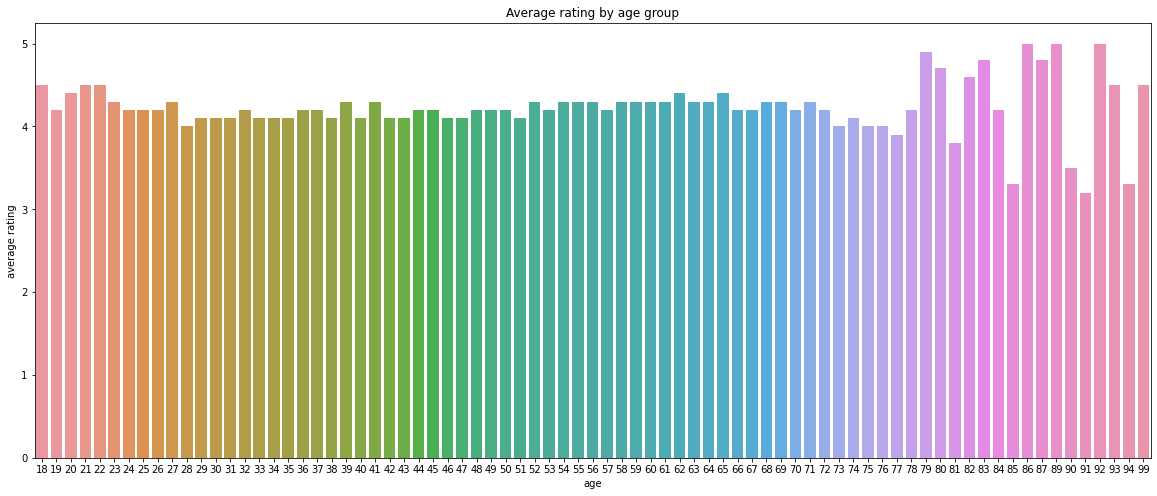

In [183]:
plt.figure(figsize=(20,8))
plot = sns.barplot(data=df_rating, x='age',y="average rating")
plot.set(title = "Average rating by age group")

#### Observation: The average rating is in same range for age group 18 - 70
    *  After 70 age rating is showing fluctuation it can be the case of we have less data for people after 70 

In [212]:
data = []
for i in list(df['age'].unique()):
    data.append([int(i), round(len(df[['recommend_index ']][(df['age'] == i) & (df['recommend_index '] == 1)])/len(df[['recommend_index ']][df['age'] == i]), 3)*100])

print(data)

[[40, 80.4], [62, 87.0], [47, 81.5], [45, 82.8], [37, 79.2], [43, 79.4], [83, 97.7], [34, 82.1], [49, 84.3], [32, 83.2], [41, 83.8], [53, 81.2], [23, 85.0], [71, 82.39999999999999], [31, 78.60000000000001], [64, 83.0], [50, 83.1], [35, 79.5], [38, 78.8], [36, 82.5], [72, 84.8], [42, 79.9], [44, 82.0], [56, 83.7], [60, 84.8], [75, 65.4], [59, 86.0], [30, 79.10000000000001], [46, 77.4], [79, 100.0], [66, 88.8], [21, 91.2], [52, 84.8], [39, 87.3], [33, 77.8], [29, 78.2], [54, 85.5], [26, 81.6], [63, 83.3], [51, 81.39999999999999], [65, 89.8], [55, 84.5], [28, 75.7], [25, 80.9], [57, 82.6], [24, 83.7], [27, 82.8], [61, 86.3], [48, 81.8], [19, 87.5], [58, 87.0], [69, 85.0], [68, 85.8], [87, 100.0], [70, 83.89999999999999], [74, 84.0], [67, 79.60000000000001], [20, 87.0], [22, 90.4], [82, 84.6], [92, 100.0], [77, 72.2], [80, 90.0], [90, 50.0], [84, 83.3], [76, 80.0], [73, 80.0], [89, 100.0], [78, 80.0], [91, 40.0], [94, 66.7], [93, 100.0], [85, 83.3], [86, 100.0], [99, 100.0], [81, 60.0], [1

In [204]:
len(df[['recommend_index ']][(df['age'] == i) & (df['recommend_index '] == 1)])/len(df[['recommend_index ']][df['age'] == i])
# df.head()

0.8038897893030794

[Text(0.5, 1.0, 'Recommendation percentage by age group')]

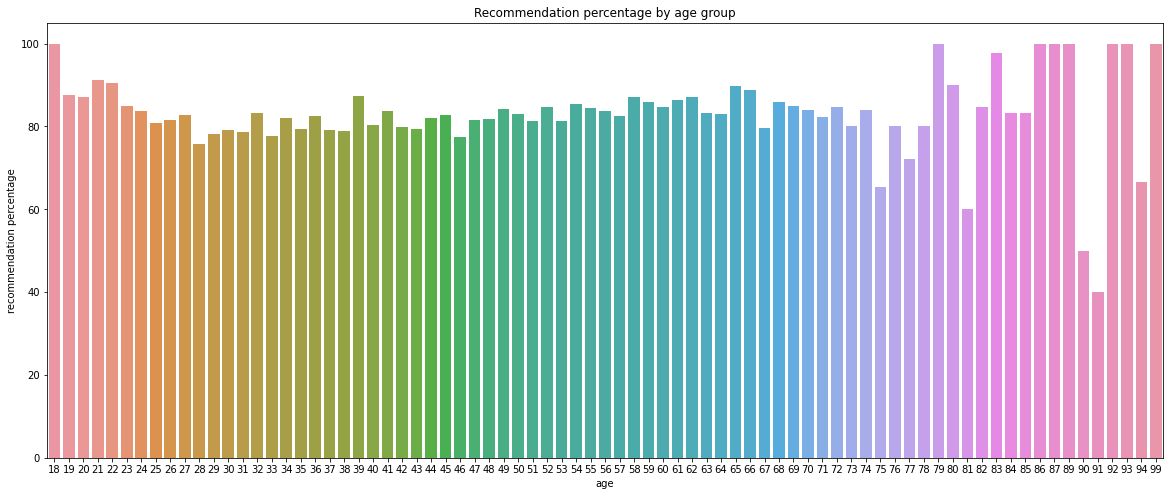

In [213]:
df_percentage = pd.DataFrame(data,columns=['age','recommendation percentage'])
df_percentage.sort_values(by='age', ascending=True, inplace=True)
df_percentage.reset_index(drop = True, inplace=True)
plt.figure(figsize=(20,8))
plot = sns.barplot(data=df_percentage, x='age',y="recommendation percentage")
plot.set(title = "Recommendation percentage by age group")

#### Observation: Average recommendation percentage is around 75%

<h1>-------------------------------------------------------------------------------------</h1>

## Thank You...